<a href="https://colab.research.google.com/github/priyanjanjb/Cat-or-Dog-Image-Classifier/blob/Classifier/CatOrDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow -q
!pip install numpy -q
!pip install matplotlib -q
!pip install pandas -q

!pip install opendatasets -q



In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time #calculate time

import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification') #download dataset

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: priyanjanperera16
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:03<00:00, 66.3MB/s]


In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128) #height and width

In [5]:
train_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/train"
test_data_dir = "/content/cats-and-dogs-for-classification/cats_dogs/test"

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory (train_data_dir,
                                                         batch_size =BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         subset = "training",
                                                         validation_split = 0.1,
                                                         seed = 42)

validation_data = tf.keras.utils.image_dataset_from_directory (train_data_dir,
                                                         batch_size =BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         subset = "validation",
                                                         validation_split = 0.1,
                                                         seed = 42)
test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size =BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         )

Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [7]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [8]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape) #(32, 128, 128, 3) batch size 32 imge size 128 128 color chanal 3
  print (label_batch.shape)

(32, 128, 128, 3)
(32,)


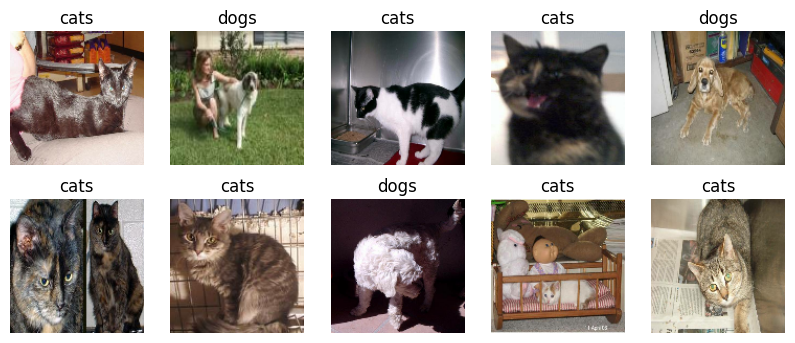

In [9]:
#plot data sample
plt.figure(figsize=(10,4))
for image,label  in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [10]:
#data preprocessing
#feature scaling
for image,label  in train_data.take(1):
  for i in range(10):
    print (image)

tf.Tensor(
[[[[101.00769   104.00769   109.00769  ]
   [111.074585  112.71521   114.30505  ]
   [117.635284  115.31354   112.59396  ]
   ...
   [129.86246   132.91324   136.22964  ]
   [126.8725    133.10297   135.69281  ]
   [128.9002    138.99207   139.94614  ]]

  [[ 85.20029    88.20029    93.20029  ]
   [ 99.3725     99.79227   101.78906  ]
   [114.00287   112.997925  110.048706 ]
   ...
   [116.720825  120.720825  123.720825 ]
   [119.9389    126.16937   128.75922  ]
   [138.79547   147.0824    148.93893  ]]

  [[ 92.54297    94.90234    99.58203  ]
   [ 91.57605    91.986206   93.986206 ]
   [105.38388   104.38388   101.75107  ]
   ...
   [120.73743   125.52237   128.52237  ]
   [130.21445   135.21445   138.21445  ]
   [127.32648   134.36554   136.68585  ]]

  ...

  [[118.07504   122.07504   125.07504  ]
   [121.617584  125.617584  128.61758  ]
   [130.54602   134.54602   137.54602  ]
   ...
   [ 81.51825    87.02301    96.76108  ]
   [ 45.951294   50.819916   54.147003 ]
   [ 

In [11]:
train_data = train_data.map(lambda x,y:(x/255.0,y))
validation_data = validation_data.map(lambda x,y:(x/255.0,y))
test_data = test_data.map(lambda x,y:(x/255.0,y))
#feature scaling


In [12]:
for image,label  in train_data.take(1):
  for i in range(2):
    print (image)

tf.Tensor(
[[[[0.15117954 0.08451287 0.12372855]
   [0.1564951  0.08982843 0.12904412]
   [0.14387254 0.07720588 0.11642157]
   ...
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.15078124 0.08411458 0.12333027]
   [0.1463848  0.07971814 0.11893383]
   [0.13852635 0.07185968 0.11107536]
   ...
   [0.         0.         0.        ]
   [0.         0.00127145 0.        ]
   [0.         0.         0.        ]]

  [[0.15681386 0.09014719 0.12936288]
   [0.15010071 0.08343404 0.12264973]
   [0.1491728  0.08250613 0.12172181]
   ...
   [0.00392157 0.         0.        ]
   [0.         0.00392157 0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.7237403  0.6738876  0.726761  ]
   [0.7528033  0.7035823  0.75956535]
   [0.77319306 0.71951526 0.7698836 ]
   ...
   [0.04705882 0.00392157 0.03529412]
   [0.05098039 0.         0.03529412]
   [0.0395804  0.         0.03137255]]

  [[0.7596398  0.66668636 0.694030

In [13]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [14]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [16]:

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [17]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/20
225/225 [==============================] - 287s 1s/step - loss: 0.6837 - accuracy: 0.5808 - val_loss: 0.6835 - val_accuracy: 0.5200
Epoch 2/20
225/225 [==============================] - 263s 1s/step - loss: 0.6419 - accuracy: 0.6290 - val_loss: 0.6036 - val_accuracy: 0.6538
Epoch 3/20
225/225 [==============================] - 255s 1s/step - loss: 0.6266 - accuracy: 0.6433 - val_loss: 0.5889 - val_accuracy: 0.6862
Epoch 4/20
225/225 [==============================] - 255s 1s/step - loss: 0.6048 - accuracy: 0.6732 - val_loss: 1.2022 - val_accuracy: 0.5487
Epoch 5/20
225/225 [==============================] - 258s 1s/step - loss: 0.5845 - accuracy: 0.6915 - val_loss: 0.6888 - val_accuracy: 0.6162
Epoch 6/20
225/225 [==============================] - 259s 1s/step - loss: 0.5653 - accuracy: 0.7060 - val_loss: 0.6562 - val_accuracy: 0.6562
Epoch 7/20
225/225 [==============================] - 262s 1s/step - loss: 0.5538 - accuracy: 0.7129 - val_loss: 0.5213 - val_accuracy: 0.7375

In [23]:
print(f'Total time for training {((end_time-start_time)/3600):.2f} hours')

Total time for training 1.57 hours


# **Preformans**


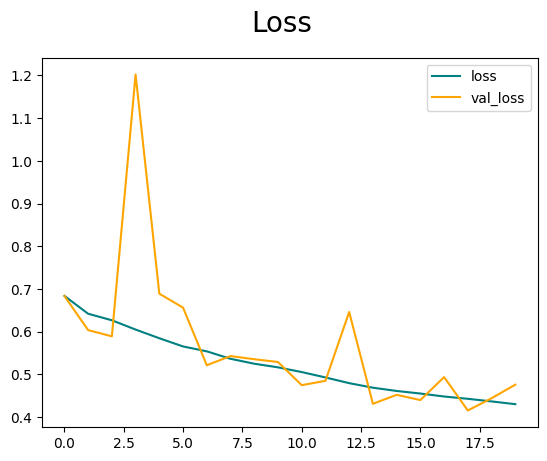

In [24]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend()
plt.show()

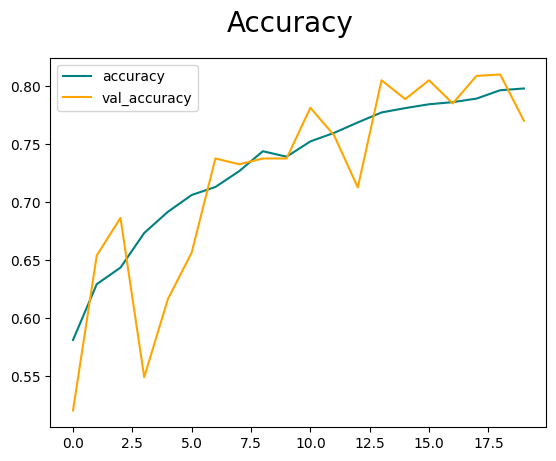

In [25]:

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend()
plt.show()



**modele evaluation**



In [26]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()


In [27]:
for batch in test_data.as_numpy_iterator(): #test data set
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 236ms/step


In [28]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6880805>

In [30]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.889>

In [31]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.743>

**TEST**

In [32]:
!pip install opencv-python -q

In [33]:
import cv2

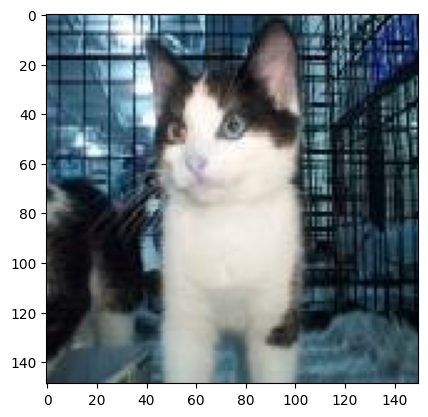

In [60]:
img = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/train/cats/cat.1000.jpg')
plt.imshow(img)
plt.show()

In [61]:

resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255


In [62]:
scaled_image.shape

TensorShape([128, 128, 3])

In [63]:
np.expand_dims(scaled_image, 0).shape

(1, 128, 128, 3)

In [64]:
y_hat  = model.predict(np.expand_dims(scaled_image, 0))

1/1 [==============================] - 0s 30ms/step


In [65]:
y_hat

array([[0.08150287]], dtype=float32)

In [66]:
class_names # y_hat<0.5 cats  y_hat>0.5

['cats', 'dogs']

In [67]:
if y_hat > 0.5:
    print(f'{class_names[1]}')
else:
    print(f'{class_names[0]}')


cats
